<a href="https://colab.research.google.com/github/RobertSloan22/Regression-Models/blob/main/RegressionModelsNFTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED LEARNING REGRESSION MODEL: NFT DATA TENSOR API`**

## **Importing the libraries and overview of the dataset**

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.read_csv('/content/drive/My Drive/MachineLearning/datapullfeb26.csv')

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
0,594b6808-9527-426a-999b-07fbb6a3aa69,594b6808-9527-426a-999b-07fbb6a3aa69,cryptoundeads,cryptoundeads,-0.0217,0.1445,0.0000,1.125000e+10,1.209375e+10,1.231000e+10,...,23,40,3,495,0.000000e+00,1.450000e+10,7.497594e+09,3.471032e+09,115,700
1,05c52d84-2e49-4ed9-a473-b43cab41e777,05c52d84-2e49-4ed9-a473-b43cab41e777,tensorians,tensorians,-0.0004,-0.0741,-0.1951,7.439000e+10,7.773755e+10,7.630000e+10,...,0,0,0,0,NaN,NaN,NaN,NaN,0,0
2,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,froganas,froganas,0.0085,0.3537,0.1273,6.200000e+09,6.293000e+09,6.530000e+09,...,54,66,1,684,0.000000e+00,1.900000e+10,4.410737e+09,1.856737e+09,227,1391
3,ae80aafd-0534-49e2-9c3e-bc751467d7e5,ae80aafd-0534-49e2-9c3e-bc751467d7e5,sujikowarrior,sujiko_warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.368700e+09,6.281515e+09,...,24,21,1,346,0.000000e+00,2.000000e+10,4.706550e+09,2.053297e+09,10,133
4,bd366797-5599-417a-be03-1e43a7e3fb90,bd366797-5599-417a-be03-1e43a7e3fb90,mad_lads,madlads,-0.0101,-0.0117,0.0125,1.620000e+11,1.712340e+11,1.680100e+11,...,18,44,0,312,0.000000e+00,1.792100e+11,8.744950e+10,4.878455e+10,17,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106595,98c16b28-ae1f-48b7-b7a2-ae9fb27cfbf6,verse_estate_new_york,verse_estate_new_york,verse_estate_new_york,0.0000,0.0000,0.0806,3.900000e+09,3.997500e+09,2.760010e+09,...,0,0,0,9,1.040000e+09,2.760010e+09,2.299669e+09,6.686997e+08,0,8
106596,695d9220-a35f-48c9-8e34-4c8443e93d9f,portals,portals,portals,0.0000,-0.0416,-0.2427,1.314000e+10,1.379700e+10,1.300000e+10,...,4,1,2,12,5.900000e+09,5.000000e+10,1.533067e+10,1.259491e+10,1,4
106597,dbac6d36-dc01-45d2-9476-c2635bfe2596,dbac6d36-dc01-45d2-9476-c2635bfe2596,whal3s,whal3s,-0.0002,-0.0065,-0.1116,6.130000e+09,6.221950e+09,4.100000e+09,...,2,1,0,11,2.000000e+09,6.460000e+09,3.836834e+09,1.202677e+09,0,10
106598,556d0740-d44a-46c0-8c03-17349a060181,556d0740-d44a-46c0-8c03-17349a060181,9_rmx_,9_rmx_,-0.0263,0.0000,0.0000,1.850000e+08,1.933250e+08,1.316324e+08,...,0,0,0,2,5.100000e+07,1.600000e+08,1.055000e+08,7.707464e+07,0,4


In [ ]:
pd.read_csv('/content/drive/My Drive/datapullfebtest.csv')

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
0,594b6808-9527-426a-999b-07fbb6a3aa69,594b6808-9527-426a-999b-07fbb6a3aa69,cryptoundeads,cryptoundeads,-0.0217,0.1445,0.0000,1.125000e+10,1.209375e+10,1.231000e+10,...,23,40,3,495,0.0,1.450000e+10,7.497594e+09,3.471032e+09,115,700
1,05c52d84-2e49-4ed9-a473-b43cab41e777,05c52d84-2e49-4ed9-a473-b43cab41e777,tensorians,tensorians,-0.0004,-0.0741,-0.1951,7.439000e+10,7.773755e+10,7.630000e+10,...,0,0,0,0,NaN,NaN,NaN,NaN,0,0
2,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,froganas,froganas,0.0085,0.3537,0.1273,6.200000e+09,6.293000e+09,6.530000e+09,...,54,66,1,684,0.0,1.900000e+10,4.410737e+09,1.856737e+09,227,1391
3,ae80aafd-0534-49e2-9c3e-bc751467d7e5,ae80aafd-0534-49e2-9c3e-bc751467d7e5,sujikowarrior,sujiko_warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.368700e+09,6.281515e+09,...,24,21,1,346,0.0,2.000000e+10,4.706550e+09,2.053297e+09,10,133
4,bd366797-5599-417a-be03-1e43a7e3fb90,bd366797-5599-417a-be03-1e43a7e3fb90,mad_lads,madlads,-0.0101,-0.0117,0.0125,1.620000e+11,1.712340e+11,1.680100e+11,...,18,44,0,312,0.0,1.792100e+11,8.744950e+10,4.878455e+10,17,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69595,6c145f56-9269-427e-b129-01cfabf69970,lily,lily,lily,0.0000,0.0690,0.0422,6.200000e+08,6.603000e+08,6.318355e+08,...,115,18,4,72,1.0,9.460000e+09,7.486700e+08,1.485931e+09,303,333
69596,7d062d08-566f-48d7-a21a-2715b345cd26,7d062d08-566f-48d7-a21a-2715b345cd26,smol_shrooms29,smol_shrooms29,0.0435,0.0000,0.0000,4.800000e+08,5.160000e+08,1.000000e+05,...,0,0,0,1,100000.0,1.000000e+05,1.000000e+05,NaN,0,0
69597,6e176e55-321d-489d-b90c-4523f25b85cc,everseed_rangers,everseed_rangers,everseed_rangers,0.0000,0.0000,0.1726,2.099000e+09,2.151475e+09,1.620000e+09,...,0,0,0,7,500000000.0,1.620000e+09,1.234857e+09,4.229796e+08,0,10
69598,ce9789f9-1dd7-47d9-86eb-4a5aeb736fdc,ce9789f9-1dd7-47d9-86eb-4a5aeb736fdc,bonkznft,bonkznft,0.0000,0.0145,-0.0244,5.853659e+08,6.292683e+08,5.570000e+08,...,183,52,8,32,10000000.0,1.528000e+10,1.564060e+09,2.194857e+09,836,926


In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/MachineLearning/datapullfeb26.csv')
train_df.head()

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
0,594b6808-9527-426a-999b-07fbb6a3aa69,594b6808-9527-426a-999b-07fbb6a3aa69,cryptoundeads,cryptoundeads,-0.0217,0.1445,0.0000,1.125000e+10,1.209375e+10,1.231000e+10,...,23,40,3,495,0.0,1.450000e+10,7.497594e+09,3.471032e+09,115,700
1,05c52d84-2e49-4ed9-a473-b43cab41e777,05c52d84-2e49-4ed9-a473-b43cab41e777,tensorians,tensorians,-0.0004,-0.0741,-0.1951,7.439000e+10,7.773755e+10,7.630000e+10,...,0,0,0,0,NaN,NaN,NaN,NaN,0,0
2,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,froganas,froganas,0.0085,0.3537,0.1273,6.200000e+09,6.293000e+09,6.530000e+09,...,54,66,1,684,0.0,1.900000e+10,4.410737e+09,1.856737e+09,227,1391
3,ae80aafd-0534-49e2-9c3e-bc751467d7e5,ae80aafd-0534-49e2-9c3e-bc751467d7e5,sujikowarrior,sujiko_warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.368700e+09,6.281515e+09,...,24,21,1,346,0.0,2.000000e+10,4.706550e+09,2.053297e+09,10,133
4,bd366797-5599-417a-be03-1e43a7e3fb90,bd366797-5599-417a-be03-1e43a7e3fb90,mad_lads,madlads,-0.0101,-0.0117,0.0125,1.620000e+11,1.712340e+11,1.680100e+11,...,18,44,0,312,0.0,1.792100e+11,8.744950e+10,4.878455e+10,17,144


In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/datapullfebtest.csv')
test_df.head()

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
0,594b6808-9527-426a-999b-07fbb6a3aa69,594b6808-9527-426a-999b-07fbb6a3aa69,cryptoundeads,cryptoundeads,-0.0217,0.1445,0.0000,1.125000e+10,1.209375e+10,1.231000e+10,...,23,40,3,495,0.0,1.450000e+10,7.497594e+09,3.471032e+09,115,700
1,05c52d84-2e49-4ed9-a473-b43cab41e777,05c52d84-2e49-4ed9-a473-b43cab41e777,tensorians,tensorians,-0.0004,-0.0741,-0.1951,7.439000e+10,7.773755e+10,7.630000e+10,...,0,0,0,0,NaN,NaN,NaN,NaN,0,0
2,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,froganas,froganas,0.0085,0.3537,0.1273,6.200000e+09,6.293000e+09,6.530000e+09,...,54,66,1,684,0.0,1.900000e+10,4.410737e+09,1.856737e+09,227,1391
3,ae80aafd-0534-49e2-9c3e-bc751467d7e5,ae80aafd-0534-49e2-9c3e-bc751467d7e5,sujikowarrior,sujiko_warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.368700e+09,6.281515e+09,...,24,21,1,346,0.0,2.000000e+10,4.706550e+09,2.053297e+09,10,133
4,bd366797-5599-417a-be03-1e43a7e3fb90,bd366797-5599-417a-be03-1e43a7e3fb90,mad_lads,madlads,-0.0101,-0.0117,0.0125,1.620000e+11,1.712340e+11,1.680100e+11,...,18,44,0,312,0.0,1.792100e+11,8.744950e+10,4.878455e+10,17,144


### Note: The first section of the notebook is the section that has been covered in the previous case studies. For this discussion, this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data description and observations from EDA.

In [ ]:

nft_counts = test_df['name'].value_counts()
most_common_nft = nft_counts.index[0]
most_common_nft_df = test_df[test_df['name'] == most_common_nft]
print(most_common_nft_df)


                                         id  \
91     f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
242    f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
393    f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
545    f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
690    f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
...                                     ...   
68933  f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
69084  f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
69235  f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
69380  f0ef9548-e592-455e-8ad2-c8ee5a394a8a   
69532  f0ef9548-e592-455e-8ad2-c8ee5a394a8a   

                                       slug        slug_me slug_display  \
91     f0ef9548-e592-455e-8ad2-c8ee5a394a8a  moneypennynft   moneypenny   
242    f0ef9548-e592-455e-8ad2-c8ee5a394a8a  moneypennynft   moneypenny   
393    f0ef9548-e592-455e-8ad2-c8ee5a394a8a  moneypennynft   moneypenny   
545    f0ef9548-e592-455e-8ad2-c8ee5a394a8a  moneypennynft   moneypenny   
690    f0ef9548-e592-455e-8ad2-c8ee5a394a8a  moneypennynft  

In [ ]:
test_df = most_common_nft_df
test_df.head()

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
91,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,0.0000,0.0245,0.1558,4.600000e+09,4.945000e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
242,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,-0.0652,-0.0423,0.0750,4.300000e+09,4.622500e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
393,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,-0.0652,-0.0423,0.0750,4.300000e+09,4.622500e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
545,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,-0.0652,-0.0423,0.0750,4.300000e+09,4.622500e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
690,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,0.0884,0.0423,0.1700,4.680000e+09,5.031000e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28


In [ ]:

# Get the top occurring NFT in the name column
top_nft = train_df['name'].value_counts().index[0]

# Filter the train_df to only include rows with the top occurring NFT
top_nft_df = train_df[train_df['name'] == top_nft]

# Display the top_nft_df
top_nft_df.head()
top_nft_df.shape

(714, 41)

In [ ]:
# prompt: get the second top occuring nft in the name column and make a df with just it called test_df

second_top_nft = train_df['name'].value_counts().index[1]
test_df = train_df[train_df['name'] == second_top_nft]


In [ ]:
test_df.head()

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
55,3b95f275-2d28-42db-8989-c1545f12129b,alpha_gardener,alpha_gardener,alpha_gardener,0.0,-0.0059,0.1781,3.380000e+10,3.768362e+10,3.100000e+10,...,0,0,0,22,10000.0,3.100000e+10,1.507857e+10,1.129418e+10,0,9
206,3b95f275-2d28-42db-8989-c1545f12129b,alpha_gardener,alpha_gardener,alpha_gardener,0.0,-0.0059,0.1781,3.380000e+10,3.768362e+10,3.100000e+10,...,0,0,0,22,10000.0,3.100000e+10,1.507857e+10,1.129418e+10,0,9
356,3b95f275-2d28-42db-8989-c1545f12129b,alpha_gardener,alpha_gardener,alpha_gardener,0.0,-0.0059,0.1781,3.380000e+10,3.768362e+10,3.100000e+10,...,0,0,0,22,10000.0,3.100000e+10,1.507857e+10,1.129418e+10,0,9
507,3b95f275-2d28-42db-8989-c1545f12129b,alpha_gardener,alpha_gardener,alpha_gardener,0.0,-0.0059,0.1267,3.380000e+10,3.768362e+10,3.100000e+10,...,0,0,0,22,10000.0,3.100000e+10,1.507857e+10,1.129418e+10,0,9
658,3b95f275-2d28-42db-8989-c1545f12129b,alpha_gardener,alpha_gardener,alpha_gardener,0.0,-0.0059,0.1267,3.380000e+10,3.768362e+10,3.100000e+10,...,0,0,0,22,10000.0,3.100000e+10,1.507857e+10,1.129418e+10,0,9


In [ ]:
test_df.shape

(713, 41)

### **Loading the datasets**

In [ ]:
# Checking the first 5 rows of the dataset
train_df= top_nft_df
train_df.head()

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
91,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,0.0000,0.0245,0.1558,4.600000e+09,4.945000e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
242,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,-0.0652,-0.0423,0.0750,4.300000e+09,4.622500e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
393,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,-0.0652,-0.0423,0.0750,4.300000e+09,4.622500e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
545,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,-0.0652,-0.0423,0.0750,4.300000e+09,4.622500e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28
690,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,f0ef9548-e592-455e-8ad2-c8ee5a394a8a,moneypennynft,moneypenny,0.0884,0.0423,0.1700,4.680000e+09,5.031000e+09,4.200000e+09,...,7,2,1,17,1000.0,1.000000e+10,3.357050e+09,2.169462e+09,17,28


In [ ]:
test_df.shape

(713, 41)

In [ ]:
test_df.shape

(713, 41)

In [ ]:
train_df.nunique()

id                                   1
slug                                 1
slug_me                              1
slug_display                         1
v2_floor1h                         152
v2_floor24h                        204
v2_floor7d                         240
v2_buy_now_price                   117
v2_buy_now_price_net_fees          128
v2_sell_now_price                  111
v2_sell_now_price_net_fees          91
v2_num_listed                       29
v2_num_mints                         1
v2_sales1h                           9
v2_sales24h                         15
v2_sales7d                          30
v2_volume1h                        117
v2_volume24h                       188
v2_volume7d                         59
first_list_date                      1
name                                 1
data_retrieved_at                  714
orders_linear                        2
orders_exponential                   9
orders_min_delta                     1
orders_max_delta         

In [ ]:
# prompt: drop all columns that have only 1 or 2 unique values

train_df = train_df.loc[:, (train_df.nunique() != 1) & (train_df.nunique() != 2)]
train_df.shape



(714, 26)

In [ ]:
# prompt: drop all columns that have only 1 or 2 unique values

test_df = test_df.loc[:, (test_df.nunique() != 1) & (test_df.nunique() != 2)]
test_df.shape

(713, 24)

In [ ]:
test_df.head()

,id,slug,slug_me,slug_display,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_buy_now_price_net_fees,v2_sell_now_price,...,orders_nfts_held,orders_pool_trade,orders_pool_nft,orders_pool_token,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,orders_nfts_sold,orders_nfts_bought
0,594b6808-9527-426a-999b-07fbb6a3aa69,594b6808-9527-426a-999b-07fbb6a3aa69,cryptoundeads,cryptoundeads,-0.0217,0.1445,0.0000,1.125000e+10,1.209375e+10,1.231000e+10,...,23,40,3,495,0.0,1.450000e+10,7.497594e+09,3.471032e+09,115,700
1,05c52d84-2e49-4ed9-a473-b43cab41e777,05c52d84-2e49-4ed9-a473-b43cab41e777,tensorians,tensorians,-0.0004,-0.0741,-0.1951,7.439000e+10,7.773755e+10,7.630000e+10,...,0,0,0,0,NaN,NaN,NaN,NaN,0,0
2,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,099c4f20-fd22-44b3-af6d-43d2b9f4cf21,froganas,froganas,0.0085,0.3537,0.1273,6.200000e+09,6.293000e+09,6.530000e+09,...,54,66,1,684,0.0,1.900000e+10,4.410737e+09,1.856737e+09,227,1391
3,ae80aafd-0534-49e2-9c3e-bc751467d7e5,ae80aafd-0534-49e2-9c3e-bc751467d7e5,sujikowarrior,sujiko_warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.368700e+09,6.281515e+09,...,24,21,1,346,0.0,2.000000e+10,4.706550e+09,2.053297e+09,10,133
4,bd366797-5599-417a-be03-1e43a7e3fb90,bd366797-5599-417a-be03-1e43a7e3fb90,mad_lads,madlads,-0.0101,-0.0117,0.0125,1.620000e+11,1.712340e+11,1.680100e+11,...,18,44,0,312,0.0,1.792100e+11,8.744950e+10,4.878455e+10,17,144


In [ ]:
train_df.nunique()

v2_floor1h                         152
v2_floor24h                        204
v2_floor7d                         240
v2_buy_now_price                   117
v2_buy_now_price_net_fees          128
v2_sell_now_price                  111
v2_sell_now_price_net_fees          91
v2_num_listed                       29
v2_sales1h                           9
v2_sales24h                         15
v2_sales7d                          30
v2_volume1h                        117
v2_volume24h                       188
v2_volume7d                         59
data_retrieved_at                  714
orders_exponential                   9
orders_avg_delta                    78
orders_recent_transactions_1hr       4
orders_recent_transactions_24hr      6
orders_sol_balance                 456
orders_nfts_held                     3
orders_pool_trade                    3
orders_pool_token                   10
orders_starting_price_avg          250
orders_starting_price_std          254
orders_nfts_bought       

In [ ]:

train_df = train_df.drop(columns=['v2_buy_now_price_net_fees', 'v2_sell_now_price_net_fees'])


In [ ]:

test_df = test_df.drop(columns=['v2_buy_now_price_net_fees', 'v2_sell_now_price_net_fees'])


In [ ]:
train_df.isnull().sum()

v2_floor1h                         8
v2_floor24h                        0
v2_floor7d                         0
v2_buy_now_price                   0
v2_sell_now_price                  0
v2_num_listed                      0
v2_sales1h                         0
v2_sales24h                        0
v2_sales7d                         0
v2_volume1h                        0
v2_volume24h                       0
v2_volume7d                        0
data_retrieved_at                  0
orders_exponential                 0
orders_avg_delta                   0
orders_recent_transactions_1hr     0
orders_recent_transactions_24hr    0
orders_sol_balance                 0
orders_nfts_held                   0
orders_pool_trade                  0
orders_pool_token                  0
orders_starting_price_avg          0
orders_starting_price_std          0
orders_nfts_bought                 0
dtype: int64

In [ ]:


train_df = train_df.reset_index(drop=True)


In [ ]:
train_df.head()

,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_num_listed,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,...,orders_avg_delta,orders_recent_transactions_1hr,orders_recent_transactions_24hr,orders_sol_balance,orders_nfts_held,orders_pool_trade,orders_pool_token,orders_starting_price_avg,orders_starting_price_std,orders_nfts_bought
0,0.0000,0.0245,0.1558,4.600000e+09,4.200000e+09,43,0,12,144,0,...,142500300.0,0,2,267998827676,7,2,17,3.357050e+09,2.169462e+09,28
1,-0.0652,-0.0423,0.0750,4.300000e+09,4.200000e+09,43,0,12,144,0,...,142500300.0,0,2,267998827676,7,2,17,3.357050e+09,2.169462e+09,28
2,-0.0652,-0.0423,0.0750,4.300000e+09,4.200000e+09,44,0,12,141,0,...,142500300.0,0,2,267998827676,7,2,17,3.357050e+09,2.169462e+09,28
3,-0.0652,-0.0423,0.0750,4.300000e+09,4.200000e+09,44,0,11,141,0,...,142500300.0,0,2,267998827676,7,2,17,3.357050e+09,2.169462e+09,28
4,0.0884,0.0423,0.1700,4.680000e+09,4.200000e+09,42,2,13,141,8590000000,...,142500300.0,0,2,267998827676,7,2,17,3.357050e+09,2.169462e+09,28


### **Checking the info of the training data**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   v2_floor1h                       706 non-null    float64
 1   v2_floor24h                      714 non-null    float64
 2   v2_floor7d                       714 non-null    float64
 3   v2_buy_now_price                 714 non-null    float64
 4   v2_sell_now_price                714 non-null    float64
 5   v2_num_listed                    714 non-null    int64  
 6   v2_sales1h                       714 non-null    int64  
 7   v2_sales24h                      714 non-null    int64  
 8   v2_sales7d                       714 non-null    int64  
 9   v2_volume1h                      714 non-null    int64  
 10  v2_volume24h                     714 non-null    int64  
 11  v2_volume7d                      714 non-null    int64  
 12  data_retrieved_at     

In [ ]:
train_df.isnull().sum()

v2_floor1h                         8
v2_floor24h                        0
v2_floor7d                         0
v2_buy_now_price                   0
v2_sell_now_price                  0
v2_num_listed                      0
v2_sales1h                         0
v2_sales24h                        0
v2_sales7d                         0
v2_volume1h                        0
v2_volume24h                       0
v2_volume7d                        0
data_retrieved_at                  0
orders_exponential                 0
orders_avg_delta                   0
orders_recent_transactions_1hr     0
orders_recent_transactions_24hr    0
orders_sol_balance                 0
orders_nfts_held                   0
orders_pool_trade                  0
orders_pool_token                  0
orders_starting_price_avg          0
orders_starting_price_std          0
orders_nfts_bought                 0
dtype: int64

In [ ]:

train_df = train_df.fillna(train_df.mean())


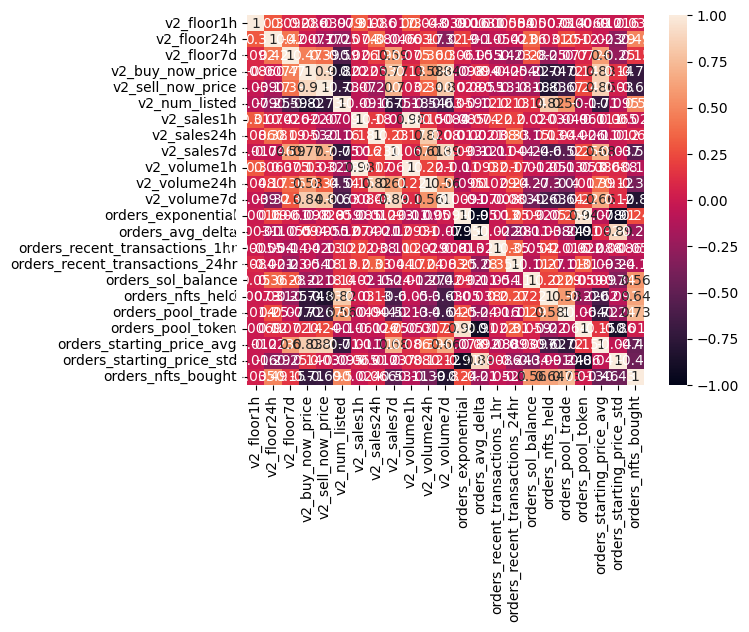

                                 v2_floor1h  v2_floor24h  v2_floor7d  \
v2_floor1h                         1.000000     0.299046    0.091942   
v2_floor24h                        0.299046     1.000000    0.419403   
v2_floor7d                         0.091942     0.419403    1.000000   
v2_buy_now_price                   0.085698    -0.007684    0.467289   
v2_sell_now_price                 -0.038672    -0.167401    0.392191   
v2_num_listed                     -0.078724    -0.252435   -0.587811   
v2_sales1h                         0.307183     0.074459    0.026305   
v2_sales24h                        0.086189     0.377028    0.185896   
v2_sales7d                        -0.016618    -0.046100    0.593321   
v2_volume1h                        0.298752     0.062888    0.074513   
v2_volume24h                       0.048194     0.173784    0.355419   
v2_volume7d                       -0.038719    -0.317835    0.303015   
orders_exponential                -0.001594     0.193692    0.06

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create the correlation matrix
corr = train_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.show()

# Print the correlation values
print(corr)


In [ ]:
# prompt: convert the column data_retrieved_at into an  numerical data type

train_df['data_retrieved_at'] = pd.to_datetime(train_df['data_retrieved_at'])
train_df['data_retrieved_at'] = train_df['data_retrieved_at'].map(pd.Timestamp.timestamp)


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Drop columns with high correlation (adjust threshold as needed)
correlation_threshold = 0.5
highly_correlated = set()

# Create correlation matrix
corr_matrix = train_df.corr()

# Identify highly correlated columns
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated columns
df_filtered = train_df.drop(columns=highly_correlated)

# Display the remaining columns
print("Remaining columns:")
print(df_filtered.columns)

# Now use df_filtered for your regression analysis
# For example, X = df_filtered.drop('target_column', axis=1) and y = df_filtered['target_column']


Remaining columns:
Index(['v2_floor1h', 'v2_floor24h', 'v2_floor7d', 'v2_buy_now_price',
       'v2_sales1h', 'v2_sales24h', 'orders_exponential',
       'orders_recent_transactions_1hr', 'orders_recent_transactions_24hr'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Drop columns with high correlation (adjust threshold as needed)
correlation_threshold = 0.5
highly_correlated = set()

# Create correlation matrix
corr_matrix = test_df.corr()

# Identify highly correlated columns
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated columns
df_filteredtest = test_df.drop(columns=highly_correlated)

# Display the remaining columns
print("Remaining columns:")
print(df_filteredtest.columns)

# Now use df_filteredtest for your regression analysis
# For example, X = df_filteredtest.drop('target_column', axis=1) and y = df_filteredtest['target_column']


Remaining columns:
Index(['v2_floor1h', 'v2_floor24h', 'v2_sales1h', 'v2_sales24h',
       'data_retrieved_at', 'orders_avg_delta',
       'orders_recent_transactions_1hr'],
      dtype='object')


In [ ]:
# prompt: convert the column data_retrieved_at into an  numerical data type

test_df['data_retrieved_at'] = pd.to_datetime(test_df['data_retrieved_at'])
test_df['data_retrieved_at'] = test_df['data_retrieved_at'].map(pd.Timestamp.timestamp)


In [ ]:
test_df = df_filteredtest
test_df.head()

,v2_floor1h,v2_floor24h,v2_sales1h,v2_sales24h,data_retrieved_at,orders_avg_delta,orders_recent_transactions_1hr
55,0.0,-0.0059,0,4,2024-01-21 15:45:49.295099,955.454545,1
206,0.0,-0.0059,0,4,2024-01-21 15:56:55.180895,955.454545,1
356,0.0,-0.0059,0,4,2024-01-21 16:16:36.798808,955.454545,1
507,0.0,-0.0059,0,4,2024-01-21 16:38:04.385395,955.454545,0
658,0.0,-0.0059,0,4,2024-01-21 16:57:36.400198,955.454545,0


In [ ]:
train_df = df_filtered
train_df.head()

,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sales1h,v2_sales24h,orders_exponential,orders_recent_transactions_1hr,orders_recent_transactions_24hr
0,0.0000,0.0245,0.1558,4.600000e+09,0,12,17,0,2
1,-0.0652,-0.0423,0.0750,4.300000e+09,0,12,17,0,2
2,-0.0652,-0.0423,0.0750,4.300000e+09,0,12,17,0,2
3,-0.0652,-0.0423,0.0750,4.300000e+09,0,11,17,0,2
4,0.0884,0.0423,0.1700,4.680000e+09,2,13,17,0,2


In [ ]:
train_df.nunique()

v2_floor1h                         153
v2_floor24h                        204
v2_floor7d                         240
v2_buy_now_price                   117
v2_sales1h                           9
v2_sales24h                         15
orders_exponential                   9
orders_recent_transactions_1hr       4
orders_recent_transactions_24hr      6
dtype: int64

In [ ]:
test_df.nunique()

v2_floor1h                         95
v2_floor24h                       121
v2_sales1h                          4
v2_sales24h                        12
data_retrieved_at                 713
orders_avg_delta                   29
orders_recent_transactions_1hr      4
dtype: int64

## **EDA and Data Preprocessing**

In [ ]:
# prompt: find the mean of all the columns in the data set

train_df.mean()


v2_floor1h                        -1.454391e-03
v2_floor24h                       -2.597199e-02
v2_floor7d                        -1.454146e-01
v2_buy_now_price                   3.402373e+09
v2_sales1h                         8.557423e-01
v2_sales24h                        1.449860e+01
orders_exponential                 1.285434e+01
orders_recent_transactions_1hr     3.291317e-01
orders_recent_transactions_24hr    1.739496e+00
dtype: float64

Below we are analyzing the categorical variable **Item_Type**.

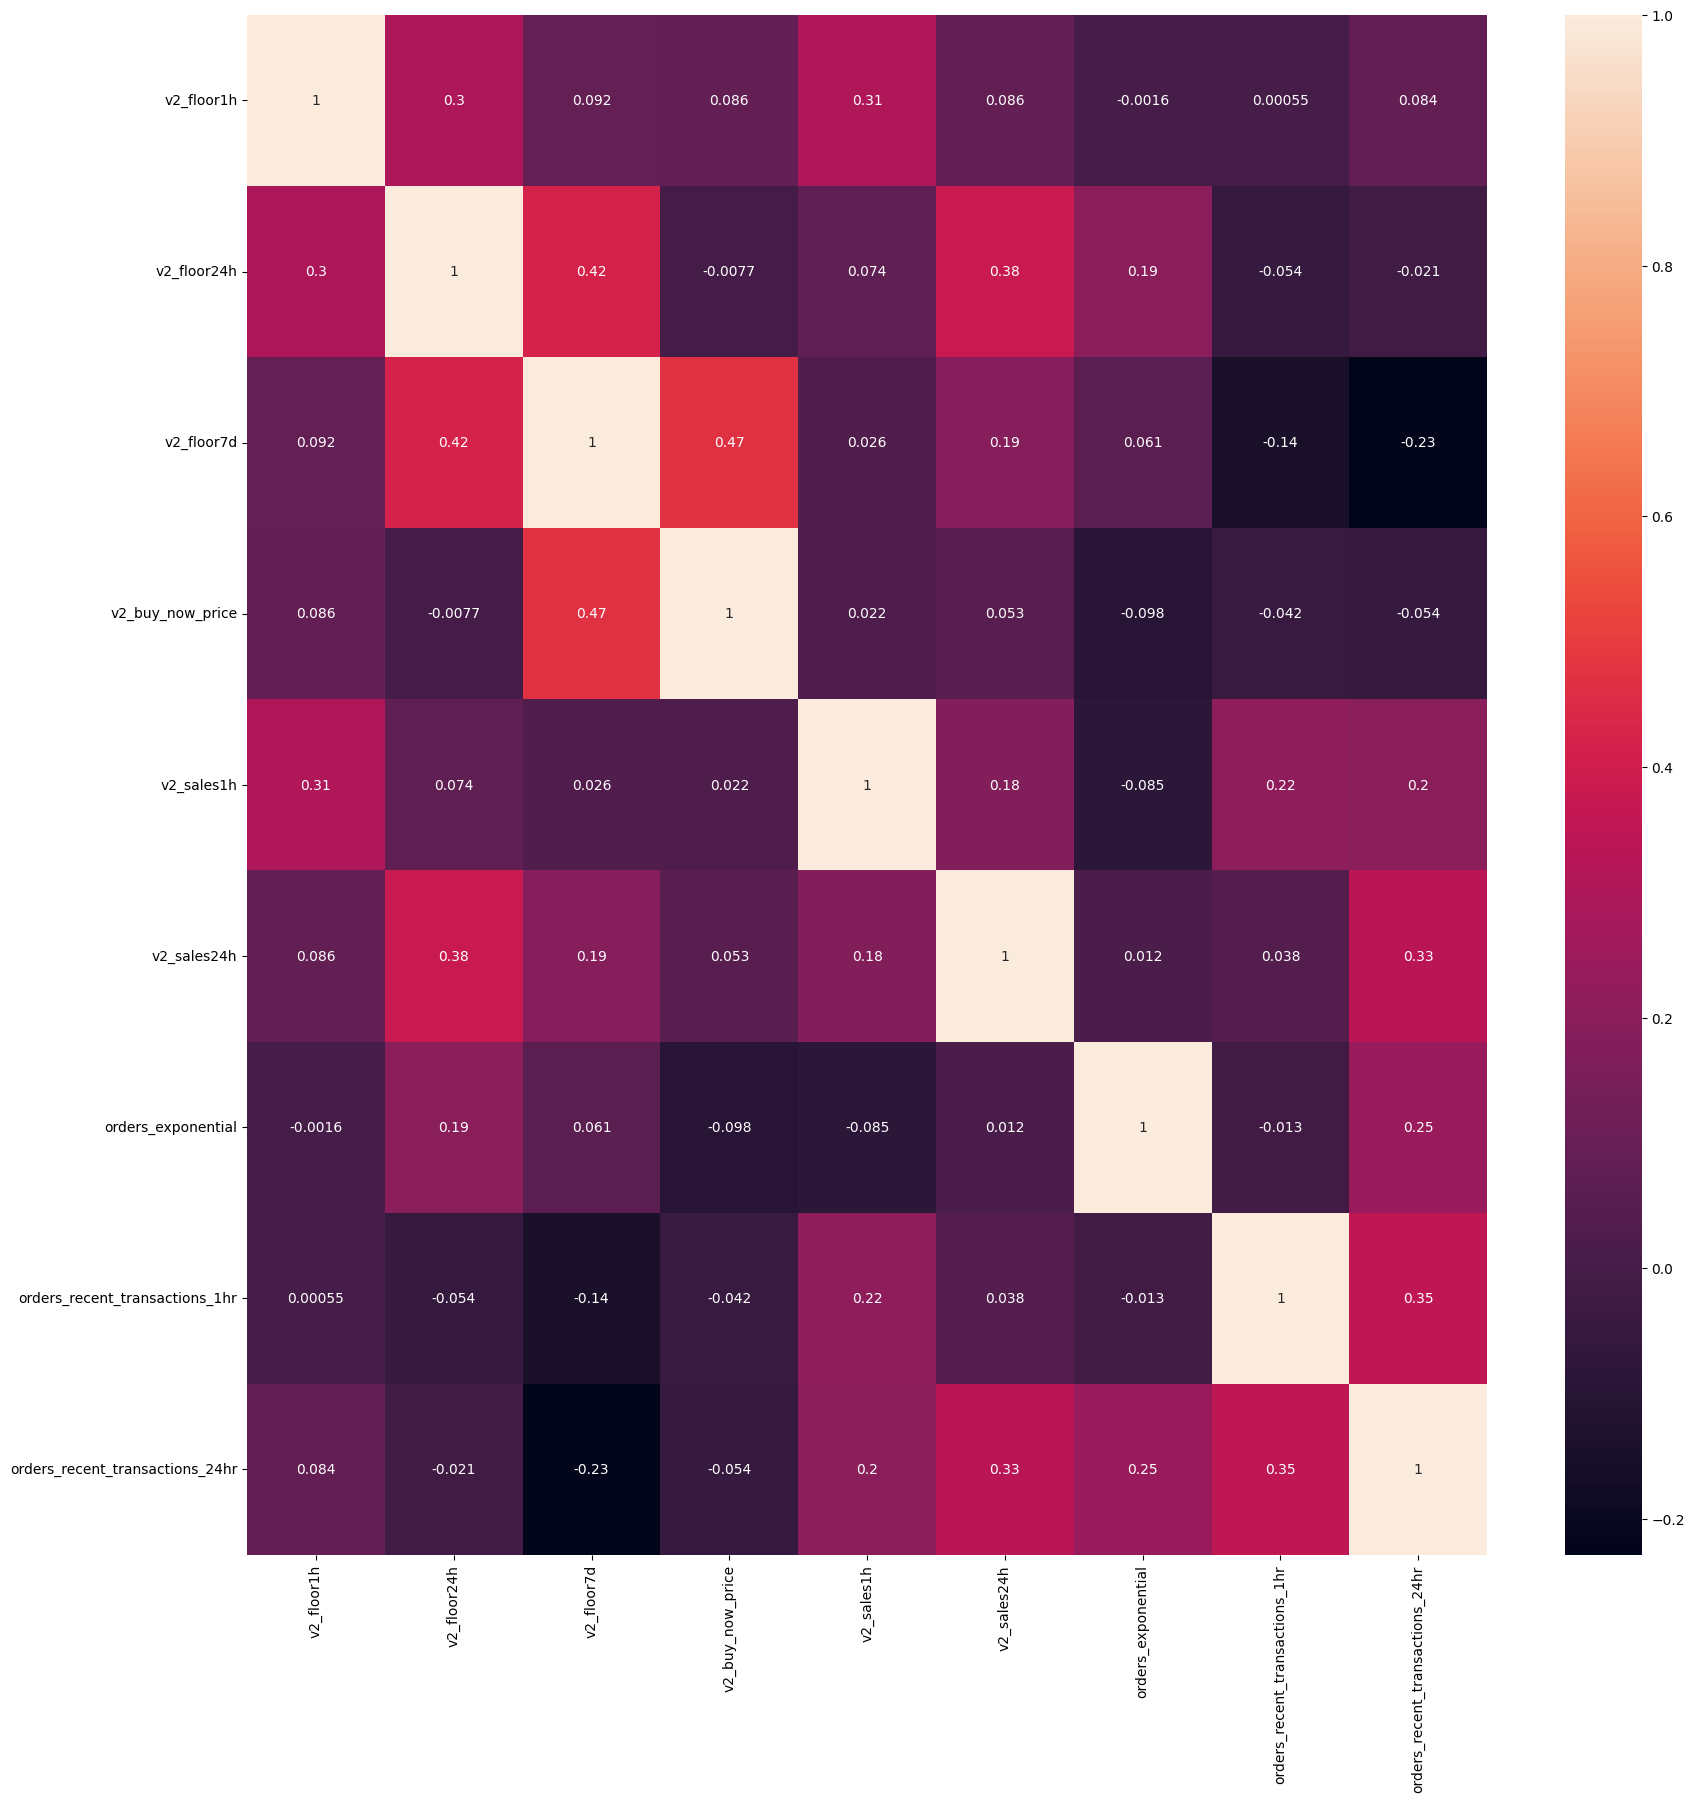

In [ ]:
# create a heat map for the train data set

plt.figure(figsize = (20, 20))

sns.heatmap(train_df.corr(), annot = True);

#### **Observations:**

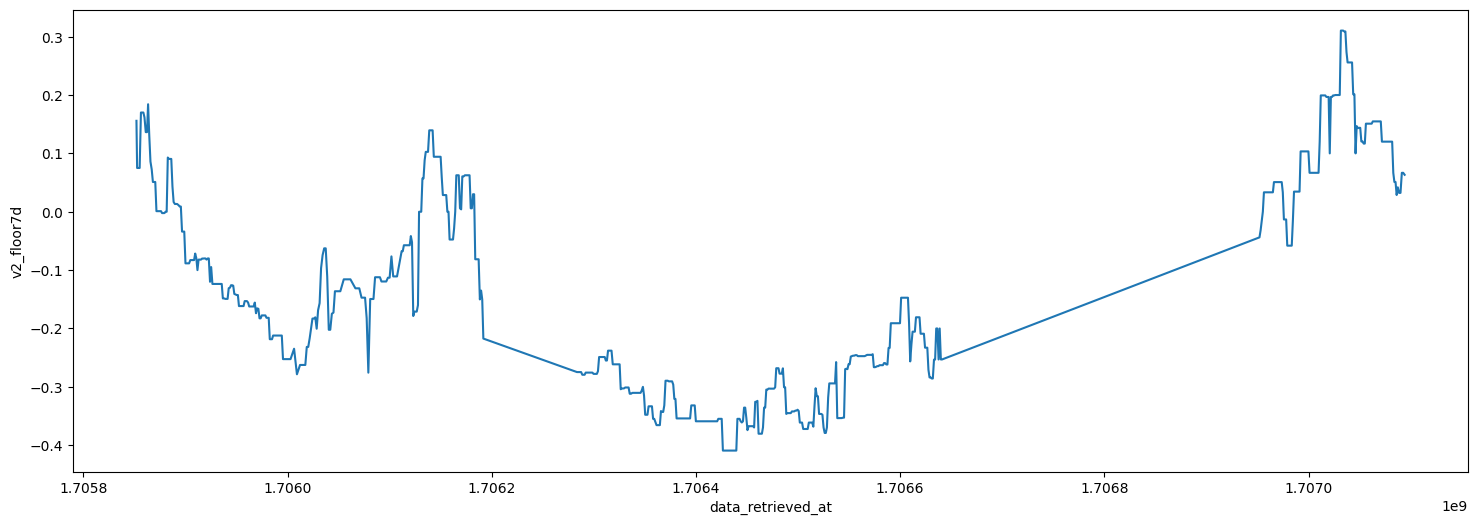

In [ ]:
fig = plt.figure(figsize = (18, 6))

sns.lineplot(x = 'data_retrieved_at', y = 'v2_floor7d', data = train_df, ci = None, estimator = 'mean');

**Observations:**

- The average sales are almost constant every year, we don't see any increasing/decreasing trend in sales with time. So, the variable year might not be a good predictor to predict sales, which we can check later in the modeling phase.
- Also, in the year 1998, the average sales plummeted. This might be due to some external factors which are not included in the data.

Next, we are trying to find out linear correlations between the variables. This will help us to know which numerical variables are correlated with the target variable. Also, we can find out **multi-collinearity**, i.e., which pair of independent variables are correlated with each other.

In [ ]:
# prompt: drop the column v2_floor7d

train_df = train_df.drop(columns=['v2_floor7d'])


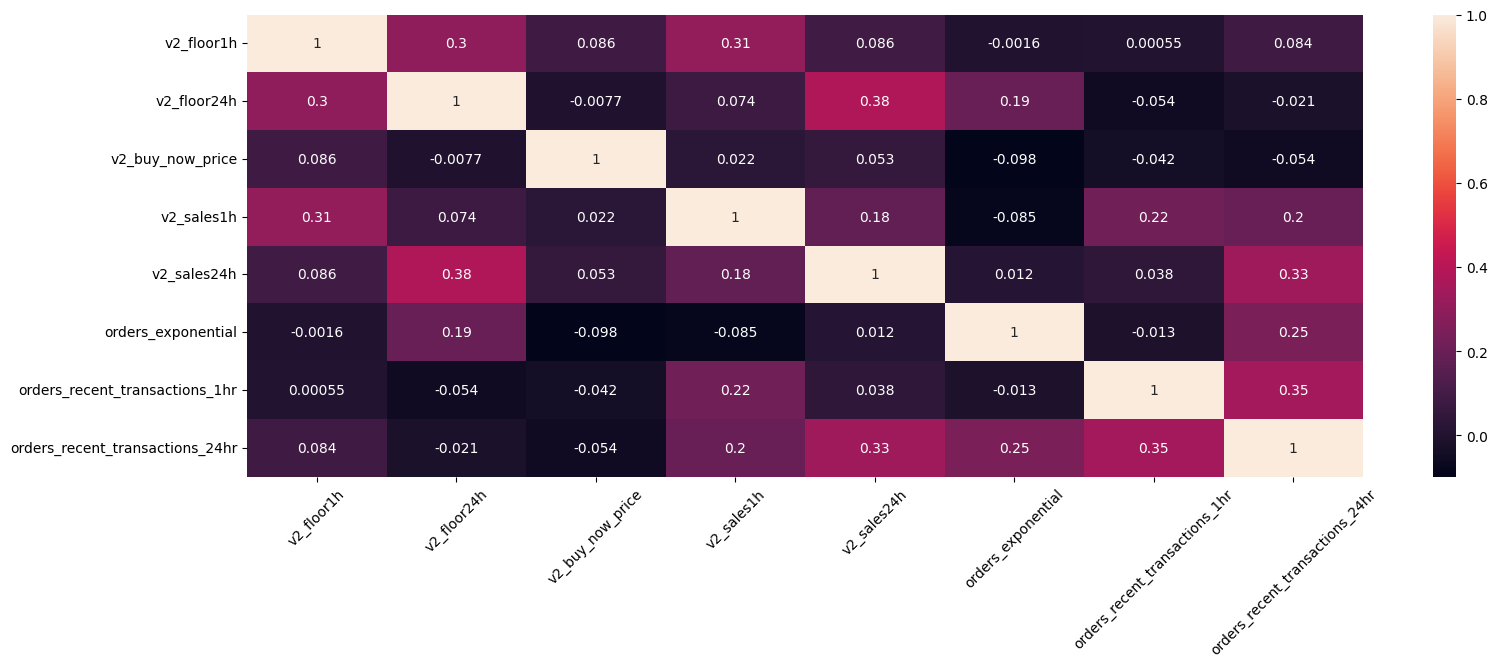

In [ ]:
fig = plt.figure(figsize = (18, 6))

sns.heatmap(train_df.corr(), annot = True);

plt.xticks(rotation = 45);

## **Modeling**

Now, that we have analyzed all the variables in the dataset, we are ready to start building the model. We have observed that not all the independent variables are important to predict the outcome variable. But at the beginning, we will use all the variables, and then from the model summary, we will decide on which variable to remove from the model. Model building is an iterative task.

In [ ]:
# We are removing the outcome variable from the feature set
# Also removing the variable Outlet_Establishment_Year, as we have created a new variable Outlet_Age
train_features = train_df.drop(['v2_floor1h'], axis = 1)

# And then we are extracting the outcome variable separately
train_target = train_df['v2_floor1h']

In [ ]:
train_df.dtypes

v2_floor1h                         float64
v2_floor24h                        float64
v2_buy_now_price                   float64
v2_sales1h                           int64
v2_sales24h                          int64
orders_exponential                   int64
orders_recent_transactions_1hr       int64
orders_recent_transactions_24hr      int64
dtype: object

In [ ]:
# prompt: convert the column data_retrieved_at into an  numerical data type

train_df['data_retrieved_at'] = pd.to_datetime(train_df['data_retrieved_at'])
train_df['data_retrieved_at'] = train_df['data_retrieved_at'].map(pd.Timestamp.timestamp)


In [ ]:
train_df.dtypes

v2_floor1h                         float64
v2_floor24h                        float64
v2_floor7d                         float64
v2_buy_now_price                   float64
v2_num_mints                         int64
v2_sales1h                           int64
v2_sales24h                          int64
v2_sales7d                           int64
orders_linear                        int64
orders_exponential                   int64
orders_min_delta                   float64
orders_max_delta                   float64
orders_recent_transactions_1hr       int64
orders_recent_transactions_24hr      int64
orders_total_profits                 int64
orders_sol_balance                   int64
orders_pool_trade                    int64
orders_pool_nft                      int64
orders_starting_price_min          float64
orders_starting_price_max          float64
orders_nfts_sold                     int64
name_Moneypenny                      uint8
dtype: object

In [ ]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,v2_floor24h,v2_buy_now_price,v2_sales1h,v2_sales24h,orders_exponential,orders_recent_transactions_1hr,orders_recent_transactions_24hr
0,0.591207,0.958614,0.00,0.357143,1.0,0.0,0.4
1,0.434986,0.803414,0.00,0.357143,1.0,0.0,0.4
2,0.434986,0.803414,0.00,0.357143,1.0,0.0,0.4
3,0.434986,0.803414,0.00,0.285714,1.0,0.0,0.4
4,0.632834,1.000000,0.25,0.428571,1.0,0.0,0.4


from matplotlib import pyplot as plt
_df_21['v2_floor24h'].plot(kind='hist', bins=20, title='v2_floor24h')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['v2_buy_now_price'].plot(kind='hist', bins=20, title='v2_buy_now_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['v2_sales1h'].plot(kind='hist', bins=20, title='v2_sales1h')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['v2_sales24h'].plot(kind='hist', bins=20, title='v2_sales24h')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='v2_floor24h', y='v2_buy_now_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='v2_buy_now_price', y='v2_sales1h', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='v2_sales1h', y='v2_sales24h', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['v2_sales1h']
  ys = series['v2_floor24h']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('v2_sales1h', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('v2_sales1h')
_ = plt.ylabel('v2_floor24h')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['v2_sales1h']
  ys = series['v2_buy_now_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('v2_sales1h', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('v2_sales1h')
_ = plt.ylabel('v2_buy_now_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['v2_sales1h']
  ys = series['v2_sales24h']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('v2_sales1h', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('v2_sales1h')
_ = plt.ylabel('v2_sales24h')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['v2_sales1h']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'v2_sales1h'}, axis=1)
              .sort_values('v2_sales1h', ascending=True))
  xs = counted['v2_sales1h']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('v2_sales1h', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('v2_sales1h')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_32['v2_floor24h'].plot(kind='line', figsize=(8, 4), title='v2_floor24h')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['v2_buy_now_price'].plot(kind='line', figsize=(8, 4), title='v2_buy_now_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['v2_sales1h'].plot(kind='line', figsize=(8, 4), title='v2_sales1h')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['v2_sales24h'].plot(kind='line', figsize=(8, 4), title='v2_sales24h')
plt.gca().spines[['top', 'right']].set_visible(False)

Now, as the dataset is ready, we are set to build the model using the **statsmodels** package.

In [ ]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:             v2_floor1h   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     24.85
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           2.18e-30
Time:                        17:39:52   Log-Likelihood:                 1481.5
No. Observations:                 714   AIC:                            -2947.
Df Residuals:                     706   BIC:                            -2910.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:             v2_floor1h   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     24.85
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           2.18e-30
Time:                        17:40:06   Log-Likelihood:                 1481.5
No. Observations:                 714   AIC:                            -2947.
Df Residuals:                     706   BIC:                            -2910.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
print(train_features_scaled.head())

   const  v2_floor24h  v2_buy_now_price  v2_sales1h  v2_sales24h  \
0    1.0     0.591207          0.958614        0.00     0.357143   
1    1.0     0.434986          0.803414        0.00     0.357143   
2    1.0     0.434986          0.803414        0.00     0.357143   
3    1.0     0.434986          0.803414        0.00     0.285714   
4    1.0     0.632834          1.000000        0.25     0.428571   

   orders_exponential  orders_recent_transactions_1hr  \
0                 1.0                             0.0   
1                 1.0                             0.0   
2                 1.0                             0.0   
3                 1.0                             0.0   
4                 1.0                             0.0   

   orders_recent_transactions_24hr  
0                              0.4  
1                              0.4  
2                              0.4  
3                              0.4  
4                              0.4  


In [ ]:
print(train_features_scaled.isnull().sum().sum())

0


In [ ]:
print(np.isfinite(train_features_scaled).all().all())

True


In [ ]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:             v2_floor1h   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     24.85
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           2.18e-30
Time:                        17:40:17   Log-Likelihood:                 1481.5
No. Observations:                 714   AIC:                            -2947.
Df Residuals:                     706   BIC:                            -2910.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_features_scaled = imputer.fit_transform(train_features_scaled)

In [ ]:
ols_model_0 = sm.OLS(train_target, train_features_scaled)
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:             v2_floor1h   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     24.85
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           2.18e-30
Time:                        17:40:38   Log-Likelihood:                 1481.5
No. Observations:                 714   AIC:                            -2947.
Df Residuals:                     706   BIC:                            -2910.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.005     -7.090      0.0

In [ ]:
ols_model_0 = sm.OLS(train_target, train_features)

ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                                 OLS Regression Results                                
Dep. Variable:             v2_floor1h   R-squared (uncentered):                   0.199
Model:                            OLS   Adj. R-squared (uncentered):              0.191
Method:                 Least Squares   F-statistic:                              25.07
Date:                Tue, 27 Feb 2024   Prob (F-statistic):                    1.20e-30
Time:                        17:41:10   Log-Likelihood:                          1481.4
No. Observations:                 714   AIC:                                     -2949.
Df Residuals:                     707   BIC:                                     -2917.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

<Axes: ylabel='Count'>

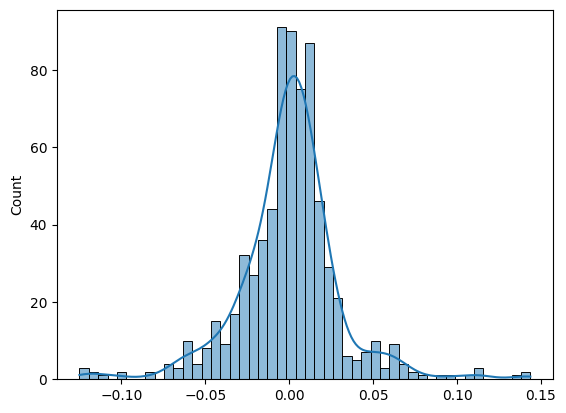

In [ ]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

We can see that the error terms are normally distributed. The assumption of normality is satisfied.

### **Linearity of Variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test this assumption, we'll plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

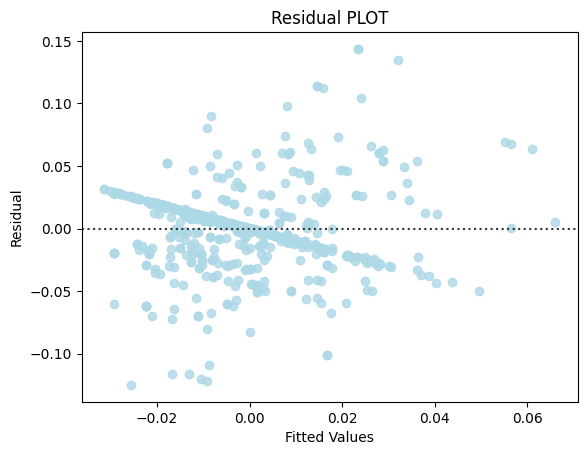

In [ ]:
# Predicted values
fitted = ols_res_0.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- We can see that there is some pattern in fitted values and residuals, i.e., the residuals are not randomly distributed.
- Let's try to fix this. We can apply the log transformation on the target variable and try to build a new model.

In [ ]:
# Log transformation on the target variable
train_target_log = np.log(train_target)

In [ ]:
# Fitting new model with the transformed target variable
ols_model_0 = sm.OLS(train_target_log, train_features_scaled)

ols_res_0 = ols_model_0.fit()